# **Customer Churn Prediction**
---


**Context**

With the rapid development of telecommunication industry, the service providers are inclined more towards expansion of the subscriber base. To meet the need of surviving in the competitive environment, the retention of existing customers has become a huge challenge. It is stated that the cost of acquiring a new customer is far more than that for retaining the existing one. Therefore, it is imperative for the telecom industries to use advanced analytics to understand consumer behavior and in-turn predict the association of the customers as whether or not they will leave the company.

**Content**

This data set contains customer level information for a telecom company. Various attributes related to the services used are recorded for each customer.

**Main Goal**

Predict which customers are churning?


**Clue:**

cari tau max scorer, fbeta score diatur 2 atau 0,5

kalo false negative : focus f2score
kalo false positive : focus precision score (f0,5)

# 1. Import Libraries and Load the Dataset

In [134]:
## EDA Standard Libary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats as ss

In [177]:
#Set to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [135]:
#Load dataset from csv file
df = pd.read_csv('/Users/Dwika/My Projects/DATASETS/telecom_churn.csv')

In [136]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [137]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [138]:
#Construct deep Info on columns & values:

datainfo = []
for i in df.columns:
    datainfo.append([i, df[i].dtypes,
                      df[i].isna().sum(),
                      round((((df[i].isna().sum())/(len(df)))*100),2), 
                    df[i].nunique(), 
                    df[i].sample(3).values])
pd.DataFrame(datainfo, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique','uniqueSample'])


,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Churn,int64,0,0.0,2,"[0, 0, 0]"
1,AccountWeeks,int64,0,0.0,212,"[221, 123, 74]"
2,ContractRenewal,int64,0,0.0,2,"[1, 1, 1]"
3,DataPlan,int64,0,0.0,2,"[0, 0, 1]"
4,DataUsage,float64,0,0.0,174,"[0.35, 0.38, 3.43]"
5,CustServCalls,int64,0,0.0,10,"[0, 2, 1]"
6,DayMins,float64,0,0.0,1667,"[132.1, 251.5, 161.3]"
7,DayCalls,int64,0,0.0,119,"[97, 58, 125]"
8,MonthlyCharge,float64,0,0.0,627,"[83.6, 54.9, 52.0]"
9,OverageFee,float64,0,0.0,1024,"[10.35, 9.71, 9.08]"


1 if customer cancelled service, 0 if not

# 2. Data Cleaning and Preprocessing

In [139]:
#Check for missing values
df.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [140]:
#Check for duplicated values
df.duplicated().sum()

0

In [141]:
#Check for outliers
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


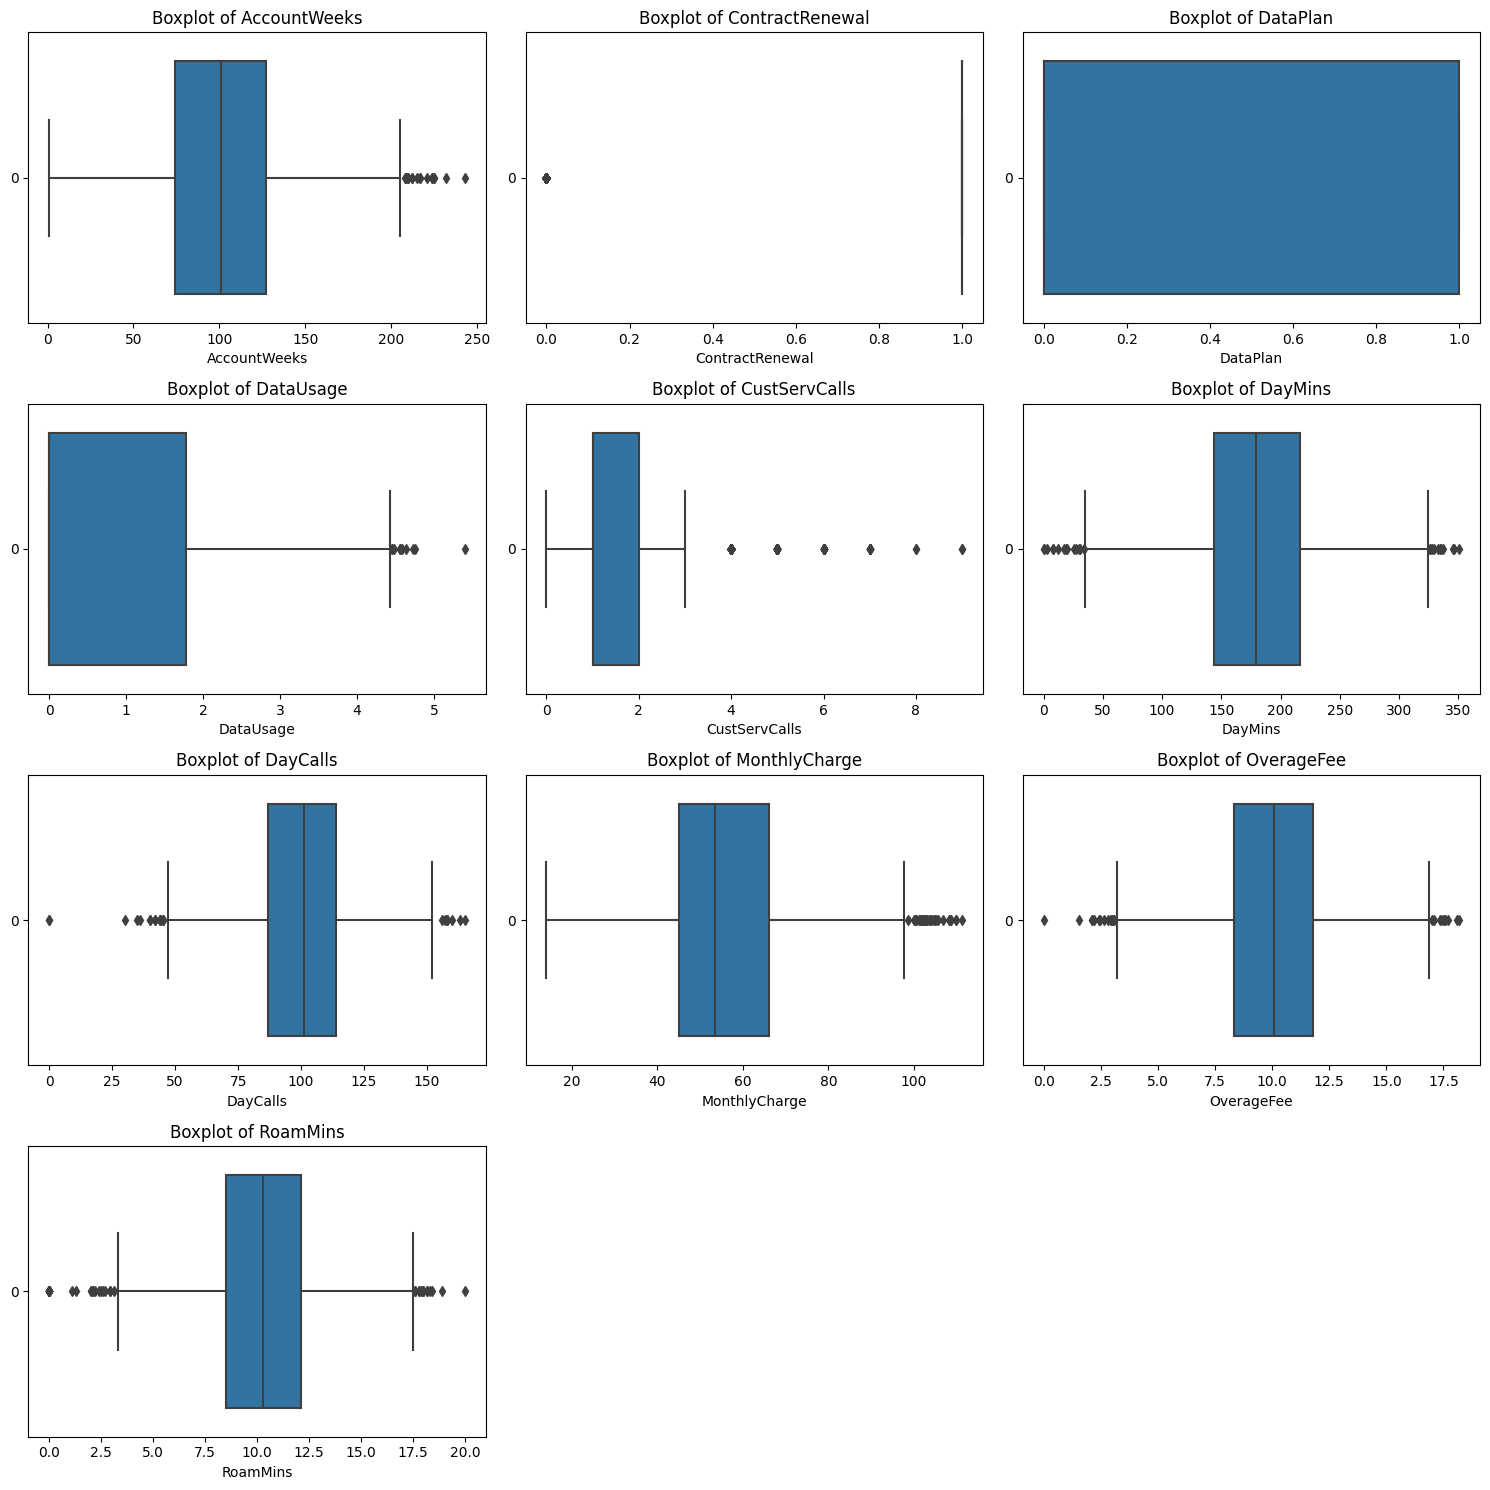

In [142]:

numerical_cols = df.drop('Churn', axis=1).select_dtypes(include=np.number).columns.tolist()
#Plotting boxplot for numerical values 
plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df[column], orient='horizontal')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

# 3. Column Transformation Schema 

In [143]:
#Check on cols
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

1. Target column: 
    - Churn, 1 if customer cancelled service, 0 if not

2. Robust Scaling for numerical cols:
    - 'DataUsage', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins'

3. Passthrough for numerical cols:
    - AccountWeeks, CustServCalls, DayCalls

4. Passthrough for categorical cols:
    - 'ContractRenewal', 'DataPlan'

In [144]:
# Check Imbalance on Target Cols
df['Churn'].value_counts(normalize=True)*100

Churn
0    85.508551
1    14.491449
Name: proportion, dtype: float64

> Imbalance

### Transformer Schema

In [164]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler

#Import OHE
from sklearn.preprocessing import OneHotEncoder

#Imbalance pipeline
from imblearn.pipeline import Pipeline


In [167]:
# Create Prerpocessing Schema

transform = ColumnTransformer([
    ('Scaler', RobustScaler(), ['DataUsage', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins'])
], remainder='passthrough')

transform

ColumnTransformer(remainder='passthrough',
                  transformers=[('Scaler', RobustScaler(),
                                 ['DataUsage', 'DayMins', 'DayCalls',
                                  'MonthlyCharge', 'OverageFee', 'RoamMins'])])

## 4. Train Test Split Data

In [147]:
#Split Data
#Splitting Data
x = df.drop('Churn' , axis=1)
y = df['Churn']

In [148]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int64

In [169]:
#Train Test Split
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y, stratify=y, test_size=0.2, random_state=2023)

In [150]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((2499, 10), (834, 10), (2499,), (834,))

# 5. Model Selection

## 5.1 Selection Criteria

Target: Churn = 1 (Customer Cabut)

Ga mau nganggep pelanggan yang cabut sebagai pelanggan yang stay

Focus on: False Negative (FN) -> Customer Cabut tapi Model Predict Customer Stay

Score: F2 Score

## 5.2 Model Selection

In [151]:
#Base Model Selection

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, make_scorer


In [179]:
#Base Models
#----------------
dtc = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier()
svc = SVC()
lr = LogisticRegression()


In [180]:
# Ensemble Models - Various Types
#----------------
vc = VotingClassifier(estimators=[
    ('dtc', DecisionTreeClassifier()),
    ('knn', KNeighborsClassifier()),
    ('lr', lr)
], voting='hard')

sc = StackingClassifier(estimators=[
    ('dtc', dtc),
    ('knn', knn),
    ('lr', lr)
], final_estimator=dtc)

In [181]:
#Ensemble Models - Same Type (Bagging)
#----------------
from sklearn.ensemble import RandomForestClassifier

# Create a random forest Classifier. By convention, clf means 'Classifier'
rf = RandomForestClassifier(random_state=2023)


In [182]:
#Ensemble Models - Same Type (Boosting)
#----------------
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

#Create Classifier
ada = AdaBoostClassifier(random_state=2023)
gbc = GradientBoostingClassifier(random_state=2023)
xgb = XGBClassifier(random_state=2023)

In [184]:
#Loop through models with imbalance data handling

# from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss

f2_scoresheet = make_scorer(fbeta_score, beta=2)

smote = SMOTE(random_state=2023)
ROS = RandomOverSampler(random_state=2023)
RUS = RandomUnderSampler(random_state=2023)  
NM = NearMiss()


model_list = [dtc, knn, svc, lr, vc, sc, rf, ada, gbc, xgb]
resample = [smote, ROS, RUS, NM]

#Model names for dataframe
model_names = ['DT', 'KNN', 'LR', 'SVC', 'VC', 'SC', 'RF', 'ADA', 'GBC', 'XGB']
resample_names = ['SMOTE', 'ROS', 'RUS', 'NM']

#Model selection score list
model_score = []
f2_score = []
std = []



#Loop through the model list
for i in model_list:
    for j in resample:  
        model_pipe = Pipeline([
            ('prep', transform),
            ('imba', j),
            ('algo', i)
        ])
        
        pipecv = cross_val_score(model_pipe, xtrain, ytrain, cv=5, scoring=f2_scoresheet)
        
        model_score.append(pipecv)
        f2_score.append(pipecv.mean())
        std.append(pipecv.std())

# Create Dataframe
scoresheet = pd.DataFrame({
    'Model': [modelname+"-"+resamplename for modelname in model_names for resamplename in resample_names],
    'F2 Score': f2_score,
    'Std': std
}).sort_values(by='F2 Score', ascending=False)

#Display the resulting Dataframe
scoresheet


,Model,F2 Score,Std
26,RF-RUS,0.766940,0.027472
34,GBC-RUS,0.751527,0.025962
33,GBC-ROS,0.746285,0.028259
38,XGB-RUS,0.737393,0.022063
24,RF-SMOTE,0.735153,0.040239
2,DT-RUS,0.721790,0.037179
25,RF-ROS,0.721281,0.035646
0,DT-SMOTE,0.714455,0.078140
36,XGB-SMOTE,0.711649,0.052498
22,SC-RUS,0.709580,0.043833


> Best Model: Random Forest Classifier

## 5.3 Apply Best Model & Evaluate Parameter

In [213]:
#Apply Best Model to Test Data
#----------------
#Model      : Random Forest
#Resampling : RandomUnderSampler

#Create Pipeline
pipe_rf = Pipeline([
    ('prep', transform),
    ('imba', RUS),
    ('algo', rf)
])

#Fit Pipeline
pipe_rf.fit(xtrain, ytrain)
pipe_rf.score(xtrain, ytrain), pipe_rf.score(xtest, ytest), cross_val_score(pipe_rf, xtrain, ytrain, cv=5, scoring=f2_scoresheet).mean()

(0.9126031507876969, 0.8740629685157422, 0.7669398189135838)

In [280]:
fbeta_score(ytest, pipe_rf.predict(xtest), beta=2)

0.7476635514018691

In [292]:
#Random Forest Model Tuning

#Import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Import kfold
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)

#setup the parameter grid for RF
space = {
    'algo__n_estimators': np.arange(100, 1001, 50),
    'algo__max_depth': np.arange(1, 21, 1),
    'algo__min_samples_split': np.arange(2, 51, 1),
    'algo__min_samples_leaf': np.arange(1, 51, 1)
}

#Initiate GridSearchCV
rf_grid = RandomizedSearchCV(pipe_rf, param_distributions=space, cv=kfold, n_iter=500, scoring=f2_scoresheet, n_jobs=-1)  #n_jobs=-1 means using all processor
rf_grid


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2023, shuffle=True),
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Scaler',
                                                                               RobustScaler(),
                                                                               ['DataUsage',
                                                                                'DayMins',
                                                                                'DayCalls',
                                                                                'MonthlyCharge',
                                                                                'OverageFee',
                                                                                'RoamMins'])])),
                                             ('imba',
                                              RandomUnderSampler(random_state=2023)),
                                             ('algo',
                                              RandomForestClassifi...
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                                        'algo__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                                        'algo__n_estimators': array([ 100,  150,  200,  250,  300,  350,  400,  450,  500,  550,  600,
        650,  700,  750,  800,  850,  900,  950, 1000])},
                   scoring=make_scorer(fbeta_score, beta=2))

In [293]:
#Apply GridSearchCV to Train Data
rf_grid.fit(xtrain, ytrain)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2023, shuffle=True),
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Scaler',
                                                                               RobustScaler(),
                                                                               ['DataUsage',
                                                                                'DayMins',
                                                                                'DayCalls',
                                                                                'MonthlyCharge',
                                                                                'OverageFee',
                                                                                'RoamMins'])])),
                                             ('imba',
                                              RandomUnderSampler(random_state=2023)),
                                             ('algo',
                                              RandomForestClassifi...
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                                        'algo__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                                        'algo__n_estimators': array([ 100,  150,  200,  250,  300,  350,  400,  450,  500,  550,  600,
        650,  700,  750,  800,  850,  900,  950, 1000])},
                   scoring=make_scorer(fbeta_score, beta=2))

In [294]:
#Check the best parameters
best_params = rf_grid.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'algo__n_estimators': 450, 'algo__min_samples_split': 23, 'algo__min_samples_leaf': 1, 'algo__max_depth': 7}


In [295]:
# Evaluate the model on the test set

#Fit model on train data
rf_grid.best_estimator_.fit(xtrain, ytrain)

#Create prediction
pred = rf_grid.predict(xtest)

In [296]:
#Evaluate model performance
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       570
           1       0.53      0.84      0.65        97

    accuracy                           0.87       667
   macro avg       0.75      0.85      0.78       667
weighted avg       0.90      0.87      0.88       667



> The recall score are used to draw conclusion from the model, how much can be saved from the accurate prediction of churned customer.

In [297]:
#F2 Score Tuned Model
fbeta_score(ytest, pred, beta=2)

0.7486136783733827

> The F2 score are used to determine the best model, because the F2 score is more focus on the recall score.